# Training and Deploying a Tensorflow model using Tensorflow
In this notebook, we will train our Tensorflow model on a GPU instance and then deploy it into production using the Sagemaker API. 

In [1]:
import sagemaker

bucket = sagemaker.Session().default_bucket()
prefix = 'radix/mnist_fashion_tutorial' 

role = sagemaker.get_execution_role() 

In [3]:
import boto3
from time import gmtime, strftime
from sagemaker.tensorflow import TensorFlow
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

In [4]:
!cat 'cnn_fashion_mnist.py'

import os
import tensorflow as tf
from tensorflow.python.estimator.model_fn import ModeKeys as Modes
from sagemaker_tensorflow import PipeModeDataset
from tensorflow.contrib.data import map_and_batch

INPUT_TENSOR_NAME = 'inputs'
SIGNATURE_NAME = 'predictions'
PREFETCH_SIZE = 10
BATCH_SIZE = 256
NUM_PARALLEL_BATCHES = 10
MAX_EPOCHS = 20


def _conv_pool(inputs, kernel_shape, kernel_count, padding_type):
    # Convolutional Layer 
    conv = tf.layers.conv2d(
      inputs=inputs,
      filters=kernel_count,
      kernel_size=kernel_shape,
      padding=padding_type,
      activation=tf.nn.relu)

    # Pooling Layer 
    pool = tf.layers.max_pooling2d(inputs=conv, pool_size=[2, 2], strides=2)
    return pool

    

def model_fn(features, labels, mode, params):
    learning_rate = params.get("learning_rate", 0.0001)
    dropout_rate = params.get("dropout_rate", 0.8)
    nw_depth = params.get("nw_depth", 2)
    optimizer_type = params.get("optimizer_type", 'adam')

    # Input Layer
    X 

## Initialize Tensorflow model through Sagemaker's Tensorflow estimator
During our final training step, it is important that we make sure that we store all the information required to set up inference models through Sagemaker. This information is stored in two files: 
    1. model_artifacts_location: trained weights
    2. custom_code_location: custom Tensorflow code for the model

Additionally, we also define the hyperparameters we found during our automatic model tuning. 

In [5]:
model_artifacts_location = "s3://sagemaker-eu-central-1-959924085179/radix/mnist_fashion_tutorial/artifacts"
custom_code_location = "s3://sagemaker-eu-central-1-959924085179/radix/mnist_fashion_tutorial/artifacts"

In [6]:
estimator = TensorFlow(entry_point='cnn_fashion_mnist.py',
                      role=role,
                      input_mode='Pipe',
                      training_steps=30000, 
                      evaluation_steps=100,
                      train_instance_count=1,
                      train_instance_type='ml.p2.xlarge',
                      base_job_name='radix-mnist-fashion',
                      hyperparameters={'nw_depth': 2, 
                                       'optimizer_type': 'adam',
                                       'dropout_rate': 0.8,
                                       'learning_rate': 0.0001
                                      })

First, we train the model on a GPU instance. As in our previous notebook, we use the pipe input mode.

In [7]:
train_data = 's3://sagemaker-eu-central-1-959924085179/radix/mnist_fashion_tutorial/data/mnist/train.tfrecords'
eval_data = 's3://sagemaker-eu-central-1-959924085179/radix/mnist_fashion_tutorial/data/mnist/validation.tfrecords'

estimator.fit({'train':train_data, 'eval':eval_data})

INFO:sagemaker:Creating training-job with name: radix-mnist-fashion-2018-08-24-12-19-57-872


.............................
2018-08-24 12:24:31,332 INFO - root - running container entrypoint
2018-08-24 12:24:31,333 INFO - root - starting train task
2018-08-24 12:24:31,354 INFO - container_support.training - Training starting
2018-08-24 12:24:34,017 INFO - botocore.vendored.requests.packages.urllib3.connectionpool - Starting new HTTP connection (1): 169.254.170.2
2018-08-24 12:24:34,305 INFO - botocore.vendored.requests.packages.urllib3.connectionpool - Starting new HTTPS connection (1): sagemaker-eu-central-1-959924085179.s3.amazonaws.com
2018-08-24 12:24:34,354 INFO - botocore.vendored.requests.packages.urllib3.connectionpool - Starting new HTTPS connection (2): sagemaker-eu-central-1-959924085179.s3.amazonaws.com
2018-08-24 12:24:34,371 INFO - botocore.vendored.requests.packages.urllib3.connectionpool - Starting new HTTPS connection (1): sagemaker-eu-central-1-959924085179.s3.eu-central-1.amazonaws.com
2018-08-24 12:24:34,406 INFO - botocore.vendored.requests.packages.urllib3

2018-08-24 12:24:44,821 INFO - tensorflow - Evaluation [60/100]
2018-08-24 12:24:44,955 INFO - tensorflow - Evaluation [70/100]
2018-08-24 12:24:45,121 INFO - tensorflow - Evaluation [80/100]
2018-08-24 12:24:45,249 INFO - tensorflow - Evaluation [90/100]
2018-08-24 12:24:45,342 INFO - tensorflow - Evaluation [100/100]
2018-08-24 12:24:45,358 INFO - tensorflow - Finished evaluation at 2018-08-24-12:24:45
2018-08-24 12:24:45,358 INFO - tensorflow - Saving dict for global step 0: accuracy = 0.080625, global_step = 0, loss = 2.2999291
2018-08-24 12:24:45.359711: I tensorflow/core/platform/s3/aws_logging.cc:54] Connection has been released. Continuing.
2018-08-24 12:24:45.368680: E tensorflow/core/platform/s3/aws_logging.cc:60] No response body. Response code: 404
2018-08-24 12:24:45.368738: W tensorflow/core/platform/s3/aws_logging.cc:57] If the signature check failed. This could be because of a time skew. Attempting to adjust the signer.
2018-08-24 12:24:45.368978: I tensorflow/core/plat

2018-08-24 12:24:55,790 INFO - tensorflow - global_step/sec: 86.626
2018-08-24 12:24:55,791 INFO - tensorflow - loss = 0.69821817, step = 600 (1.154 sec)
2018-08-24 12:24:56,981 INFO - tensorflow - global_step/sec: 83.9502
2018-08-24 12:24:56,982 INFO - tensorflow - loss = 0.62153894, step = 700 (1.191 sec)
2018-08-24 12:24:58,528 INFO - tensorflow - global_step/sec: 64.6161
2018-08-24 12:24:58,530 INFO - tensorflow - loss = 0.5302948, step = 800 (1.548 sec)
2018-08-24 12:24:59,672 INFO - tensorflow - global_step/sec: 87.4514
2018-08-24 12:24:59,673 INFO - tensorflow - loss = 0.55244637, step = 900 (1.143 sec)
2018-08-24 12:25:01,155 INFO - tensorflow - global_step/sec: 67.437
2018-08-24 12:25:01,156 INFO - tensorflow - loss = 0.5578222, step = 1000 (1.483 sec)
2018-08-24 12:25:02,321 INFO - tensorflow - global_step/sec: 85.7849
2018-08-24 12:25:02,322 INFO - tensorflow - loss = 0.51882184, step = 1100 (1.166 sec)
2018-08-24 12:25:04,155 INFO - tensorflow - global_step/sec: 54.5219
201


Billable seconds: 238


After training, we deploy our model as a service using the deploy function offered by the Tensorflow estimator. 

In [8]:
predictor = estimator.deploy(initial_instance_count=1, 
                             instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: radix-mnist-fashion-2018-08-24-12-19-57-872
INFO:sagemaker:Creating endpoint with name radix-mnist-fashion-2018-08-24-12-19-57-872


----------------------------------------------------------------!

## Random evaluation
To check that our API is online we can send a randomly initiated image to the server and see if we get a response.

In [9]:
labels_lookup = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
                ]

In [20]:
import numpy as np
import json
import pandas as pd

random_image_data = np.random.rand(28, 28)
prediction = predictor.predict(random_image_data)
predicted_class = prediction['outputs']['classes']['int64_val'][0]
class_probabilities = prediction['outputs']['probabilities']['float_val']
pd.DataFrame({
                'selected': ['*' if i==predicted_class else '' for i in range(10)],
                'label': labels_lookup, 
                'probability': class_probabilities
              })

,label,probability,selected
0,T-shirt/top,0.037685,
1,Trouser,0.001988,
2,Pullover,0.041057,
3,Dress,0.002252,
4,Coat,0.001330,
5,Sandal,0.000769,
6,Shirt,0.113536,
7,Sneaker,0.000132,
8,Bag,0.801227,*
9,Ankle boot,0.000025,


## Manual evaluation
Let us investigate the images in the test set to see how good our model is. For each prediction, we'll visualise the probability distribution to gain insight into which classes are hard to differentiate. 

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [26]:
def predict(images):
    for image in images:
        prediction = predictor.predict(image)
        predicted_class = prediction['outputs']['classes']['int64_val'][0]
        class_probabilities = prediction['outputs']['probabilities']['float_val']
        yield class_probabilities

In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(labels_lookup[predicted_label],
                                100*np.max(predictions_array),
                                labels_lookup[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [31]:
predictions = list(predict(test_images))

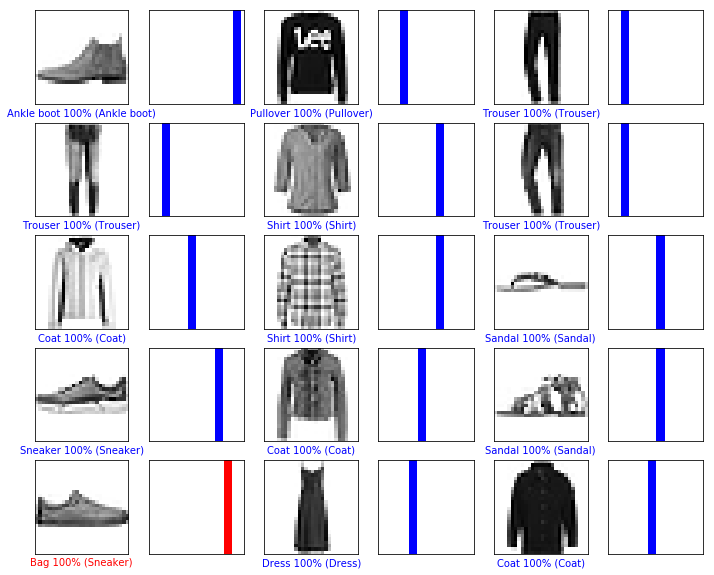

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
